# Laboratorio 1 - Pregunta 2
### Hecho por: Daniel Alonso, Alvaro García Cid, Enrique Ramos e Ignacio Regidor

##Resumen
En está práctica se estudiará una base de datos de los clientes de la sucursal del Banco Santander, específicamente de la situada en la Universidad Francisco de Vitoria.

A partir de estos datos, se realizarán diferentes clasificaciones en función de diferentes atributos (balance, edad y días en la sucursal). Además, graficaremos dichas clasificaciones para un mayor entendimiento de los datos y poder sacar conclusiones sobre estos.

##Introducción al problema y pasos previos
A continuación se muestrán las librerías de Python utilizadas en esta práctica.
- Numpy: utilizada por el resto de liberías, permite la creación y el manejo de datos de forma rápida y eficiente, conteniendo estructuras de datos propias.
- Pandas: permite la creación y manejo de dataframes a partir de la base de datos empleada.
- Matplotlib.pyplot: se utilizará para graficar los distintos diagramas que permitan el estudio de los datos de forma visual.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Preprocesamiento de los datos

Se procede a importar la base de datos contenida en un archivo .csv. Se guarda en una variable <i>dataframe</i> creada con la librería pandas a la que se le llamará "_datosraw_".

También se muestran las 5 primeras observaciones de este dataframe con la función .head() para ver si hay alguna anomalía en los atributos que deberían estar.

In [ ]:
datosraw = pd.read_csv("banco ufv.csv", encoding='latin-1', sep=';')
datosraw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Observámos que en principio la base de datos no contiene ningún error. A continuación, con la función .shape, se obtiene que la base de datos contiene 45211 clientes, cada uno con 17 atributos diferentes.

In [ ]:
datosraw.shape

(45211, 17)

Antes de filtrar y eliminar o modificar los datos que no sean útiles, se seleccionan solo los atributos que sean relevantes.
De esta forma, se evita por ejemplo, ignorar la información de un cliente que contenga un valor nulo en un atributo que no sea de interés para el objetivo de la práctica.

Los atributos utilizados serán:
- age (edad)
- education (nivel de estudios)
- balance (saldo)
- duration (días como cliente).

In [ ]:
datos = datosraw[['age','education','balance','duration']]
datos.head()

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198


## 1.Clasificación Balance 
Buscamos ver si existe una relación entre el nivel de estudios y el saldo de los clientes.  
Para ello crearemos un dataframe nuevo, a partir de datos, al que añadiremos la columna _'et_balance'_ la cual clasificará a todos los clientes en tres grupos en función de su balance. Estos son: 
1. endeudado: los que tienen deudas
2. ahorrador_norm: gente que tiene unos ahorros normales (en positivo, pero menos de 10.000 euros) 
3. ahorrador_plus: disponen de suficientes ahorros como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros)

Esto lo utilizaremos para posteriormente ver si existe dicha relación.  
Para ello primero veamos si existen valores nulos de dichos atributos en nuestro dataframe:

In [ ]:
print("Missing Values ['balance']:", (datos['balance']=='unknown').sum())
print("Missing Values ['education']:", (datos['education']=='unknown').sum())

Missing Values ['balance']: 0
Missing Values ['education']: 1857


Observamos que no existen valores nulos del balance pero si de educación. Primero agrupemos a los clientes en función de su balance como hemos mencionado anteriormente y luego trataremos los valores nulos de educación.

In [ ]:
pd.set_option('mode.chained_assignment', None) #Suprimimos warning por hacer copia
datos1 = datos
datos1['et_balance'] = datos1['balance']

#Clasificación en grupos
for i in range(len(datos1['balance'])):
  if datos1['balance'][i]< 0:
    datos1['et_balance'][i] = 'endeudado'
  elif datos1['balance'][i] > 10000:
    datos1['et_balance'][i] = 'ahorrador_plus'
  else:
    datos1['et_balance'][i] = 'ahorrador_norm'

datos1.head() #Mostramos 40 valores para poder observar que se encuentran todos los tipos de 'et_balance'

,age,education,balance,duration,et_balance
0,58,tertiary,2143,261,ahorrador_norm
1,44,secondary,29,151,ahorrador_norm
2,33,secondary,2,76,ahorrador_norm
3,47,unknown,1506,92,ahorrador_norm
4,33,unknown,1,198,ahorrador_norm


Ahora veremos cuantos tenemos de cada grupo y lo graficaremos en un piechart (gráfica circular) para un posterior análisis.

Endeudados: 3766;  Ahorradores normales: 40616;  Ahorradores plus: 829;  Suma de todos: 45211


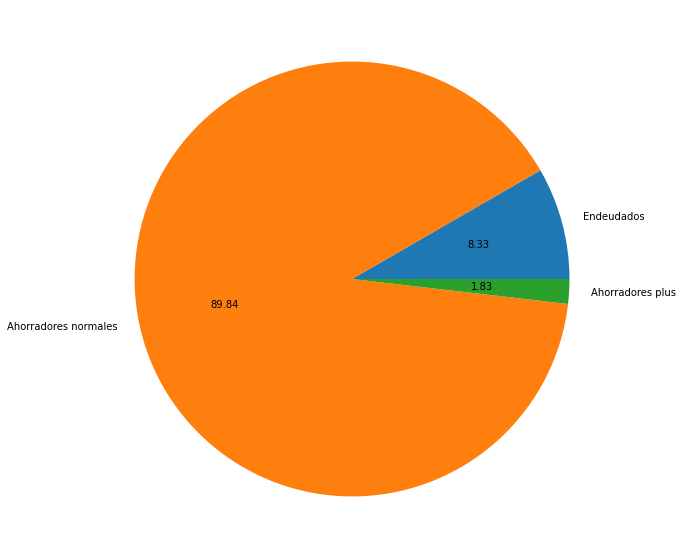

In [ ]:
#Cálculo de frecuencia de cada grupo
endeudados = len(datos1[datos1['et_balance']=='endeudado'])
ahorradores_norm = len(datos1[datos1['et_balance']=='ahorrador_norm'])
ahorradores_plus = len(datos1[datos1['et_balance']=='ahorrador_plus'])

#Piechart
print(f'Endeudados: {endeudados};  Ahorradores normales: {ahorradores_norm};  Ahorradores plus: {ahorradores_plus};  Suma de todos: {endeudados+ahorradores_norm+ahorradores_plus}')
plt.figure(figsize=(10,10))
plt.pie([endeudados, ahorradores_norm, ahorradores_plus], labels = ['Endeudados','Ahorradores normales','Ahorradores plus'], autopct='%.2f')
plt.show()

Podemos observar que la gran mayoría (89.84%) son ahorradores normales. El 10% restante se reparte en 8.33% de endeudados y un 1.83% de ahorradores plus.
Veamos ahora que sucede con la educación. Para graficamos los porcentajes en una pie-chart:

Ed. Primaria: 6851;  Ed. Secundaria: 23202;  Ed. Terciaria: 13301; Desconocidos: 1857; Suma de todos: 45211


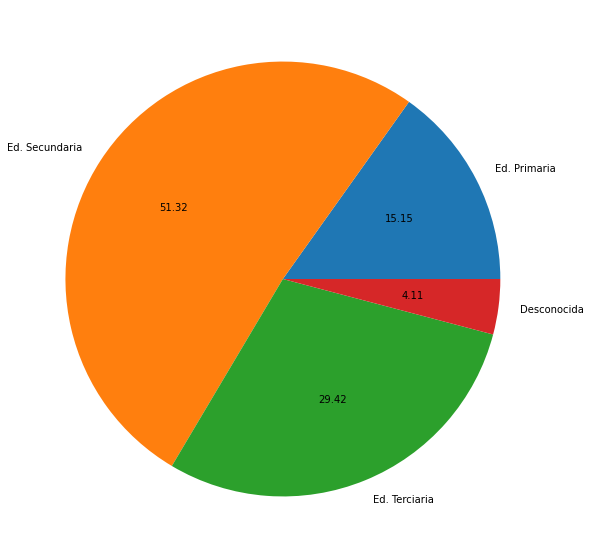

In [ ]:
#Calculo de frecuencia de cada grupo
primaria = len(datos1[datos1['education']=='primary'])
secundaria = len(datos1[datos1['education']=='secondary'])
terciaria = len(datos1[datos1['education']=='tertiary'])
desconocida = len(datos1[datos1['education']=='unknown'])

#Piechart
print(f'Ed. Primaria: {primaria};  Ed. Secundaria: {secundaria};  Ed. Terciaria: {terciaria}; Desconocidos: {desconocida}; Suma de todos: {primaria+secundaria+terciaria+desconocida}')
plt.figure(figsize=(10,10))
plt.pie([primaria, secundaria, terciaria, desconocida], labels = ['Ed. Primaria','Ed. Secundaria','Ed. Terciaria', 'Desconocida'], autopct='%.2f')
plt.show()

Podemos observar que un 15.15% se corresponde con los que tienen solamente educación primaria.Por otro lado, la mitad (51.32%) tiene educación secundaria y un 29.42% educación terciaria. No obstante, podemos observar que hay un 4.11% de los clientes cuya educación es desconocida. Debido a que es menor de un 5% nos decidimos a eliminar dichos clientes para el análisis ya que no suponen un porcentaje significante de estos.

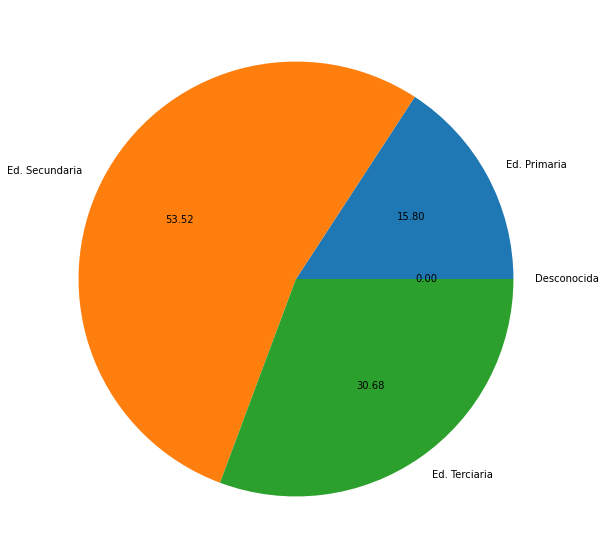

Ed. Primaria: 6851;  Ed. Secundaria: 23202;  Ed. Terciaria: 13301; Desconocidos: 0; Suma de todos: 43354


In [ ]:
datos1 = datos1[datos1['education'] != 'unknown']

#Calculo de frecuencia de cada grupo
primaria = len(datos1[datos1['education']=='primary'])
secundaria = len(datos1[datos1['education']=='secondary'])
terciaria = len(datos1[datos1['education']=='tertiary'])
desconocida = len(datos1[datos1['education']=='unknown'])

#Piechart
plt.figure(figsize=(10,10))
plt.pie([primaria, secundaria, terciaria, desconocida], labels = ['Ed. Primaria','Ed. Secundaria','Ed. Terciaria', 'Desconocida'], autopct='%.2f')
plt.show()
print(f'Ed. Primaria: {primaria};  Ed. Secundaria: {secundaria};  Ed. Terciaria: {terciaria}; Desconocidos: {desconocida}; Suma de todos: {primaria+secundaria+terciaria+desconocida}')

Tras eliminar los _'unknown'_ (datos desconocidos/faltantes) los porcentajes que quedan son 15.8% con educación primaria 53.52% con educación secundaria y 30.68% con educación terciaria. 
Ahora para poder ver si existe una relación entre dichos atributos graficaremos ambos en un diagrama de barras. en este en el eje x tendremos los grupos por educación. Es decir, primaria, secundaria y terciaria. El eje y representará la frecuencia de cada grupo en función del saldo en cada educación. Es decir _x_ endeudados, _y_ ahorradores normales y _z_ ahorradores plus con educacion primaria, etc. 

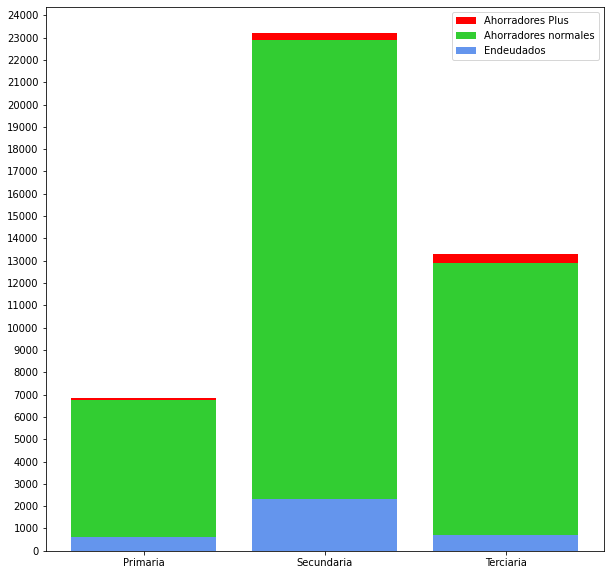


EDUCACION PRIMARIA
Endeudados: 607 (8.86%);  Ahorradores normales: 6160 (89.9%);  Ahorradores plus: 84 (1.23%);  Suma de todos: 6851

EDUCACION SECUNDARIA
Endeudados: 2311 (9.96%);  Ahorradores normales: 20590 (88.7%);  Ahorradores plus: 301 (1.3%);  Suma de todos: 23202

EDUCACION TERCIARIA
Endeudados: 720 (5.41%);  Ahorradores normales: 12177 (91.5%);  Ahorradores plus: 404 (3.04%);  Suma de todos: 13301


In [ ]:
dprimaria = datos1[datos1['education']=='primary'] # Dataframe con clientes de educación primaria
numprime = sum(dprimaria['et_balance']=='endeudado') # Numero de endeudados con ed primaria
numprima = sum(dprimaria['et_balance']=='ahorrador_norm') # Numero de ahorradores normales con ed primaria
numprimap = sum(dprimaria['et_balance']=='ahorrador_plus') # Numero de ahorradores plus con ed primaria
sumprim = numprime+numprima+numprimap

dsecundaria = datos1[datos1['education']=='secondary'] # Dataframe con clientes de educación secundaria
numsece = sum(dsecundaria['et_balance']=='endeudado')  # Numero de endeudados con ed secundaria
numseca = sum(dsecundaria['et_balance']=='ahorrador_norm') # Numero de ahorradores normales con ed secundaria
numsecap = sum(dsecundaria['et_balance']=='ahorrador_plus')
sumsec = numsece+numseca+numsecap

dterciaria = datos1[datos1['education']=='tertiary'] # Dataframe con clientes de educación terciaria
numterce = sum(dterciaria['et_balance']=='endeudado') # Numero de endeudados con ed terciaria
numterca = sum(dterciaria['et_balance']=='ahorrador_norm') # Numero de ahorradores normales con ed terciaria
numtercap = sum(dterciaria['et_balance']=='ahorrador_plus') # Numero de ahorradores plus con ed terciaria
sumterc = numterce+numterca+numtercap

#Grafica de barras de los datos calculados
plt.figure(figsize=(10,10))
plt.bar(['Primaria', 'Secundaria', 'Terciaria'],[numprime+numprima+numprimap, numsece+numseca+numsecap, numterce+numterca+numtercap], label='Ahorradores Plus', color='red')
plt.bar(['Primaria', 'Secundaria', 'Terciaria'],[numprime+numprima, numsece+numseca, numterce+numterca], label='Ahorradores normales', color='limegreen')
plt.bar(['Primaria', 'Secundaria', 'Terciaria'],[numprime, numsece, numterce], label='Endeudados', color='cornflowerblue')
plt.legend(loc='best')
plt.yticks(np.array(range(25))*1000)
plt.show()

#Números para más facil observación
print()
print('EDUCACION PRIMARIA')
print(f'Endeudados: {numprime} ({numprime*100/sumprim:.3}%);  Ahorradores normales: {numprima} ({numprima*100/sumprim:.3}%);  Ahorradores plus: {numprimap} ({numprimap*100/sumprim:.3}%);  Suma de todos: {sumprim}')
print()
print('EDUCACION SECUNDARIA')
print(f'Endeudados: {numsece} ({numsece*100/sumsec:.3}%);  Ahorradores normales: {numseca} ({numseca*100/sumsec:.3}%);  Ahorradores plus: {numsecap} ({numsecap*100/sumsec:.3}%);  Suma de todos: {sumsec}')
print()
print('EDUCACION TERCIARIA')
print(f'Endeudados: {numterce} ({numterce*100/sumterc:.3}%);  Ahorradores normales: {numterca} ({numterca*100/sumterc:.3}%);  Ahorradores plus: {numtercap} ({numtercap*100/sumterc:.3}%);  Suma de todos: {sumterc}')

De la gráfica y los porcentajes podemos concluir que no hay una relación directa entre la educación y el balance. No obstante, cabe recalcar que tenemos el triple de datos de clientes con Educación Secundaria que con Educación Primaria. Con esto lo que queremos llegar a explicar es que a lo mejor hay un sesgo en los datos de Educación Primaria que nos impide ver si realmente existe algún tipo de relación. Y es que, si observámos los porcentajes de Educación Secundaria y Terciaria solamente, podríamos deducir que efectivamente si existe una gran relación entre la educación y el balance. Los endeudados se reducen casi un 50%, los ahorradores normales aumentan un 3% y (lo más significativo) los ahorradores _plus_ aumentan casi un 250%. Esta conclusión sería bastante más lógica. Sin embargo, como hemos dicho con estos datos no existe una relación entre el balance y la educación. O por lo menos entre la Educación Primaria y Secundaria. Ya que si que vemos un cambio significativo en el balance de los clientes con Educación Terciaria.

## 2.Clasificación por edades
Para el apartado dos primero crearemos un dataframe nuevo, a partir de datos, al que añadiremos la columna _'age_class'_ la cual clasificará a todos los clientes en cuatro grupos en función de su edad. Estos son: 
1. Alumno: menos de 30 años
2. Trabajador: entre 30 y 45 años
3. Veterano: entre 45 y 65 años
4. No vinculado: mayor de 65 años  

Para ello primero veamos si existen valores nulos de dicho atributo en nuestro dataframe:

In [ ]:
print("Missing Values ['age']:", len(datos[datos['age']=='unknown']))

Missing Values ['age']: 0


Observamos que no existen valores nulos de este atributo por lo que procedemos a hacer lo redactado. Además veremos cuantas personas hay en cada grupo:

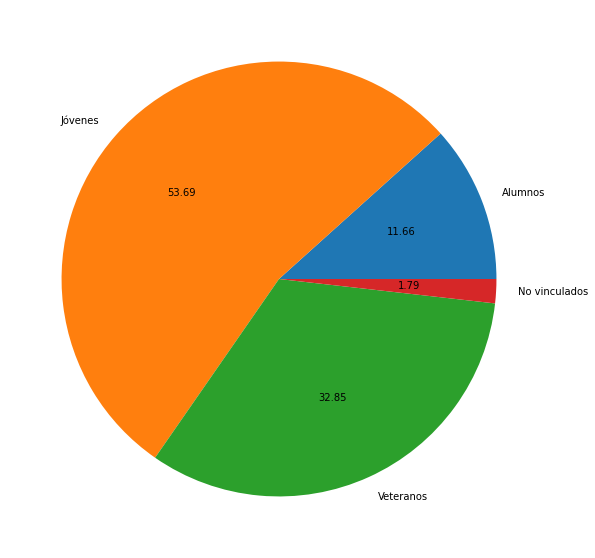

Alumnos: 5273 (11.7%);  Jovenes: 24274 (53.7%);  Veteranos: 14854 (32.9%); No vinculados: 810 (1.79%)
Suma de todos: 45211 (100%)


In [ ]:
datos2 = datos
datos2['age_class'] = 0

#Clasificación en grupos
for i in range(len(datos2['age'])):
  if datos2['age'][i] < 30:
    datos2['age_class'][i] = 'alumno'
  elif datos2['age'][i] >= 30 and datos2['age'][i] < 45:
    datos2['age_class'][i] = 'joven'
  elif datos2['age'][i] >= 45 and datos2['age'][i] < 65:
    datos2['age_class'][i] = 'veterano'
  elif datos2['age'][i] >= 65:
    datos2['age_class'][i] = 'no vinculado'
  else:
    datos2['age_class'][i] = 'unknown'

#Calculo de frecuencia de cada grupo
alumnos = len(datos2[datos2['age_class']=='alumno'])
jovenes = len(datos2[datos2['age_class']=='joven'])
veteranos = len(datos2[datos2['age_class']=='veterano'])
no_vinculados = len(datos2[datos2['age_class']=='no vinculado'])
sumatodos = alumnos+jovenes+veteranos+no_vinculados

#Piechart
plt.figure(figsize=(10,10))
plt.pie([alumnos, jovenes, veteranos, no_vinculados], labels = ['Alumnos','Jóvenes','Veteranos', 'No vinculados'], autopct='%.2f')
plt.show()

#Frecuencias y porcentaje
print(f'Alumnos: {alumnos} ({alumnos*100/sumatodos:.3}%);  Jovenes: {jovenes} ({jovenes*100/sumatodos:.3}%);  Veteranos: {veteranos} ({veteranos*100/sumatodos:.3}%); No vinculados: {no_vinculados} ({no_vinculados*100/sumatodos:.3}%)')
print(f'Suma de todos: {sumatodos} (100%)')

Podemos observar que la gran mayoría son jóvenes. Sin embargo, grafiquemoslo en un diagrama de barras para observar mejor las diferencias y ver las frecuencias de cada grupo:

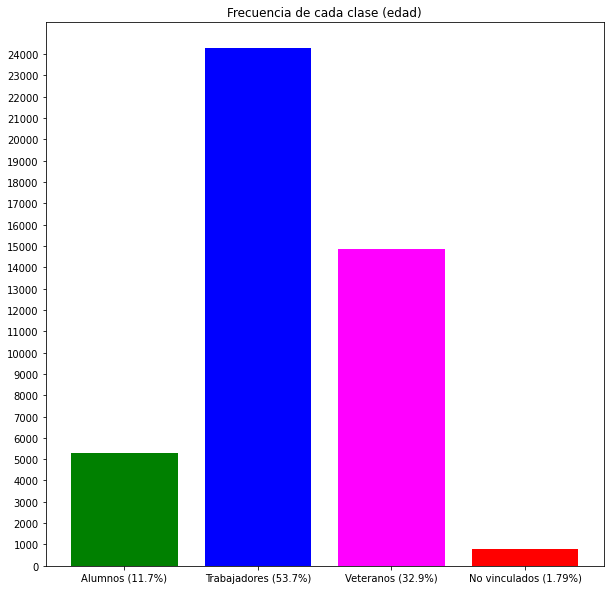

        Alumnos: 5273   Trabajadores: 24274   Veteranos: 14854  No vinculados: 810


In [ ]:
plt.figure(figsize=(10,10))
plt.bar(['Alumnos (11.7%)','Trabajadores (53.7%)','Veteranos (32.9%)','No vinculados (1.79%)'], [alumnos,jovenes,veteranos,no_vinculados], color=['green','blue','fuchsia','red'])
plt.title('Frecuencia de cada clase (edad)')
plt.yticks(np.array(range(25))*1000)
plt.show()

#Imprimir la altura de las barras (frecuencia)
print(f'        Alumnos: {alumnos}   Trabajadores: {jovenes}   Veteranos: {veteranos}  No vinculados: {no_vinculados}')

Podemos observar que la mayor parte de los clientes son trabajadores de la Universidad Francisco de Vitoria. El  segundo grupo con mas clientes son los veteranos, seguido por los alumnos y finalmente los no vinculados, los cuales podríamos considerar casos excepcionales. De esto podemos concluir que los trabajadores de la Francisco de Vitoria (profesores, limpieza, cocina, etc.) puede ser que por temas del trabajo tengan que hacer uso de la sucursal de la universidad, siendo así el grupo mas grande. Por otra parte, los veteranos podemos concluir que son los clientes fieles siguen haciendo uso de la sucursal de la Francisco (tanto trabajadores veteranos como extrabajadores y casos excepcionales). Los alumnos corresponden el tercer grupo. De estos podemos concluir que debido a su vida en la universidad un parte de estos hacen uso de la sucursal de la universidad. Por último, los no vinculados, los cuales corresponden el grupo más pequeño, puede deberse a casos excepcionales (padres, exprofesores, etc.) 

## 3.Clasificación por días

Como en los dos anteriores apartados, primero observámos si existe algún valor nulo del atributo con el que vamos a trabajar, en este caso _'duration'_. Este mide el tiempo que lleva el cliente en días.

In [ ]:
print("Missing Values ['duration']:", datos['duration'].isna().sum())

Missing Values ['duration']: 0


Al ver que no existen valores nulos procedemos con el ejercicio.  
Primero, como se nos pide, pasámos dichos valores a años  (dividiendo entre 365) y añadimos dichos valores a una nueva columna _'duration_y'_. Posteriormente graficamos en un histograma en el que dividiremos los grupos en 0-1 años, 1-2 años, etc.

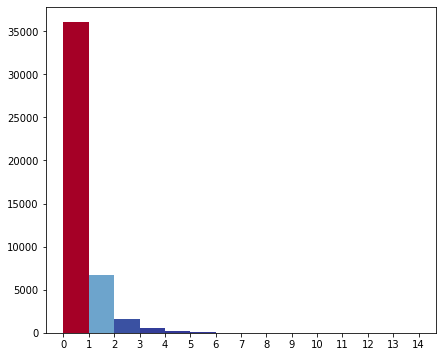

Bar 0: 36041 (79.72%)
Bar 1: 6752 (14.93%)
Bar 2: 1626 (3.60%)
Bar 3: 531 (1.17%)
Bar 4: 164 (0.36%)
Bar 5: 57 (0.13%)
Bar 6: 18 (0.04%)
Bar 7: 8 (0.02%)
Bar 8: 8 (0.02%)
Bar 9: 3 (0.01%)
Bar 10: 2 (0.00%)
Bar 11: 0 (0.00%)
Bar 12: 0 (0.00%)
Bar 13: 1 (0.00%)


In [ ]:
datos3 = datos 
datos3['duration_y'] = datos3['duration']/365
plt.figure(figsize=(7,6))
n, bins, patches = plt.hist(datos3['duration_y'], bins = range(15))
plt.xticks(bins)

# Aplicar colores
cm = plt.cm.get_cmap('RdYlBu_r') 
col = (n-n.min())/(n.max()-n.min()) 
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.show()

#Imprimir la altura de las barras (frecuencia)
nums2 = n.sum()
for i in range(len(n)):
  print(f'Bar {i}: {n[i]:.0f} ({n[i]*100/nums:.2f}%)')

Según este histograma lo que se puede concluir es que la inmensa mayoría de los clientes de la empresa llevan un año o menos en ella, a medida que avanza el tiempo que llevan vinculados a la empresa vemos que los clientes que se mantienen en ella va disminuyendo, por cual se puede concluir que los clientes tienden a desvincularse de la empresa con el paso de los años y que hay muy pocos clientes que sigan en ella después de los dos años. Esto corrobora la conclusión del anterior apartado. Los clientes activos de la sucursal son las personas que hacen su vida en la universidad (alumnos y  trabajadores). 